In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

# Rejection Sampling

Rejection sampling a Gamma using a Cauchy proposal. Exercise 23.1

In [2]:
def gamma_pdf(x: np.ndarray, a: float, b: float):
    """Gamma pdf parameterized with alpha and beta."""
    scale = 1 / b
    return stats.gamma.pdf(x, a=a, scale=scale)

In [3]:
X = np.linspace(0, 5, 4000)
a = 1.5
b = 1

In [4]:
def get_M(a: float, b: float) -> float:
    x_star = np.real(np.roots([-b, a + 1, -b, a - 1])[0])
    M = gamma_pdf(x_star, a, b) / stats.t.pdf(x_star, df=1)
    return M

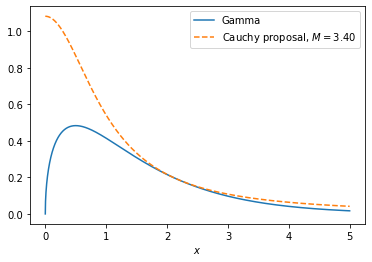

In [5]:
M = get_M(a, b)
plt.plot(X, gamma_pdf(X, a, b), label="Gamma")
plt.plot(X, M * stats.t.pdf(X, df=1), "--", label=f"Cauchy proposal, $M={M:.2f}$")
plt.legend()
plt.xlabel("$x$")
plt.savefig("../tex/img/rejection-sampling.png", dpi=400)